# Ridership analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bus_routes = pd.read_json('../data/cleaned/BusRoutes.json', lines=True)
bus_ridership_202409 = pd.read_csv('../data/cleaned/BusRideVolume202409.csv', dtype={'PT_CODE': int})

In [3]:
bus_routes.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309


In [4]:
bus_ridership_202409.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-09,WEEKENDS/HOLIDAY,5.0,BUS,59239,35,27
1,2024-09,WEEKENDS/HOLIDAY,10.0,BUS,64241,772,380
2,2024-09,WEEKDAY,18.0,BUS,53241,907,1534
3,2024-09,WEEKDAY,20.0,BUS,11161,4363,5982
4,2024-09,WEEKENDS/HOLIDAY,13.0,BUS,70041,565,495


### Understanding the ridership data in general

In [5]:
average_ridership_by_stop = bus_ridership_202409.groupby(['TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()
average_ridership_by_stop.columns = ['TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']

In [6]:
average_ridership_by_stop.head()

,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,0.0,WEEKDAY,64.845067,3.0,34.0,94.574234,10.0,111.0
1,0.0,WEEKENDS/HOLIDAY,34.155139,1.0,18.0,49.713103,6.0,58.0
2,1.0,WEEKDAY,7.057034,0.0,4.0,16.459533,2.0,18.0
3,1.0,WEEKENDS/HOLIDAY,3.771991,0.0,3.0,9.078125,2.0,10.0
4,2.0,WEEKDAY,1.422222,0.0,3.0,2.200000,1.0,2.0


Plot ridership data by time of hour for tap in/tap out volume and whether or not it is a weekday

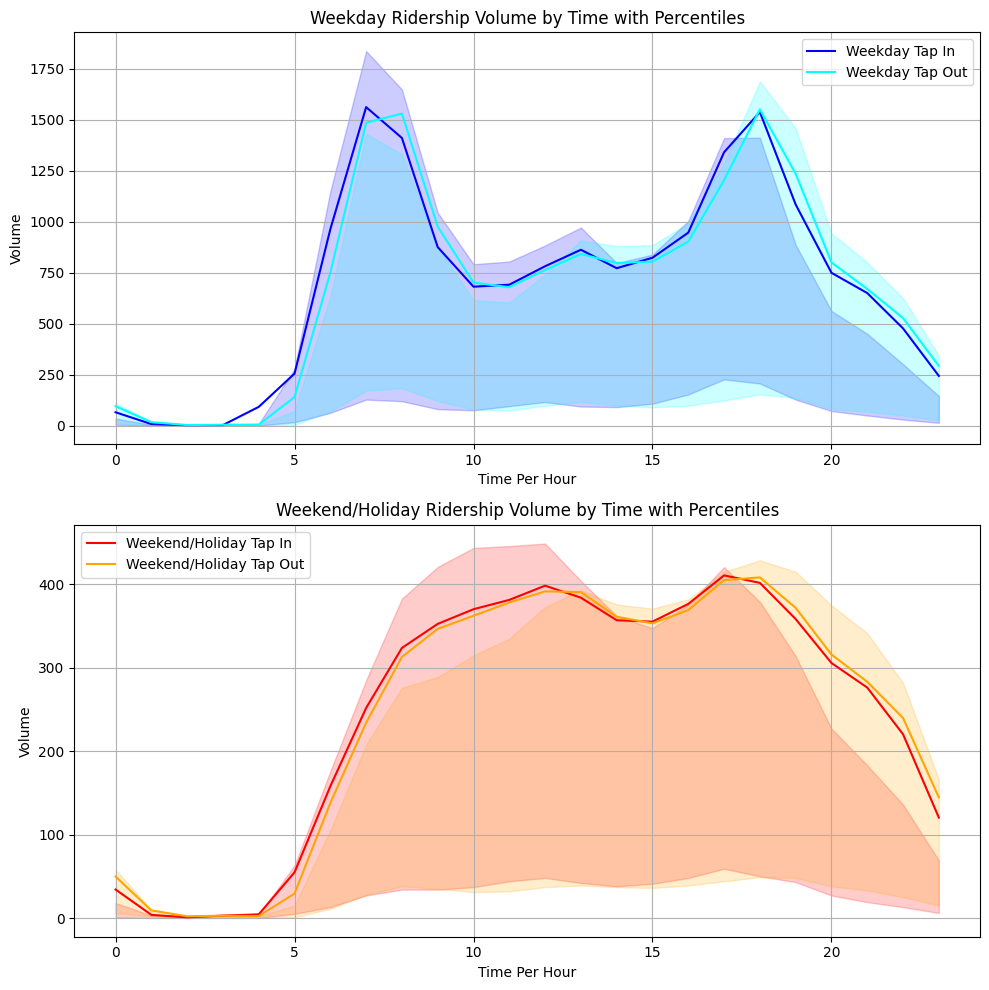

In [7]:
# Filter data for weekdays and weekends/holidays
weekdays = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKDAY']
weekends = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot for weekdays with shaded area
axes[0].plot(weekdays['TIME_PER_HOUR'], weekdays['TAP_IN_MEAN'], label='Weekday Tap In', color='blue')
axes[0].fill_between(weekdays['TIME_PER_HOUR'],
                     weekdays['TAP_IN_25'],
                     weekdays['TAP_IN_75'],
                     color='blue', alpha=0.2)
axes[0].plot(weekdays['TIME_PER_HOUR'], weekdays['TAP_OUT_MEAN'], label='Weekday Tap Out', color='cyan')
axes[0].fill_between(weekdays['TIME_PER_HOUR'],
                     weekdays['TAP_OUT_25'],
                     weekdays['TAP_OUT_75'],
                     color='cyan', alpha=0.2)

# Add labels and title for weekdays plot
axes[0].set_xlabel('Time Per Hour')
axes[0].set_ylabel('Volume')
axes[0].set_title('Weekday Ridership Volume by Time with Percentiles')
axes[0].legend()
axes[0].grid(True)

# Plot for weekends/holidays with shaded area
axes[1].plot(weekends['TIME_PER_HOUR'], weekends['TAP_IN_MEAN'], label='Weekend/Holiday Tap In', color='red')
axes[1].fill_between(weekends['TIME_PER_HOUR'],
                     weekends['TAP_IN_25'],
                     weekends['TAP_IN_75'],
                     color='red', alpha=0.2)
axes[1].plot(weekends['TIME_PER_HOUR'], weekends['TAP_OUT_MEAN'], label='Weekend/Holiday Tap Out', color='orange')
axes[1].fill_between(weekends['TIME_PER_HOUR'],
                     weekends['TAP_OUT_25'],
                     weekends['TAP_OUT_75'],
                     color='orange', alpha=0.2)

# Add labels and title for weekends/holidays plot
axes[1].set_xlabel('Time Per Hour')
axes[1].set_ylabel('Volume')
axes[1].set_title('Weekend/Holiday Ridership Volume by Time with Percentiles')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Seems like the ridership data for weekend tap out is a little skewed, since the mean is higher than the 75th percentile

### Picking a bus route to analyse if ridership is lower for some of its BusStopCodes
TODO: right now just checking if for any bus stop code, the ridership is lower than 25th percentile, whether or not it is Weekend/Weekday, and disregarding time of day  
Might want to average across tapin/tapout, time of day and weekday/weekend

In [8]:
bus_30_route = bus_routes[bus_routes['ServiceNo'] == '193']
bus_30_route.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
8595,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330
8596,193,SMRT,1,2,22441,0.8,0548,2333,0548,2334,0548,2334
8597,193,SMRT,1,3,22591,1.1,0549,2334,0549,2335,0549,2335
8598,193,SMRT,1,4,22341,1.4,0550,2335,0550,2336,0550,2336
8599,193,SMRT,1,5,22351,1.8,0552,2337,0552,2338,0552,2338


In [9]:
merged_30 = bus_30_route.merge(bus_ridership_202409, left_on='BusStopCode', right_on='PT_CODE')
merged_30.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-09,WEEKENDS/HOLIDAY,7.0,BUS,22009,17101,19420
1,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-09,WEEKENDS/HOLIDAY,10.0,BUS,22009,13967,29786
2,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-09,WEEKDAY,5.0,BUS,22009,11622,22215
3,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-09,WEEKENDS/HOLIDAY,9.0,BUS,22009,13725,24568
4,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330,2024-09,WEEKENDS/HOLIDAY,16.0,BUS,22009,29696,27276


In [10]:
ridership_30_busstops = merged_30.groupby(['BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()


ridership_30_busstops.columns = ['BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']
ridership_30_busstops

,BusStopCode,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,22009,0.0,WEEKDAY,7429.0,7429.0,7429.0,2044.0,2044.0,2044.0
1,22009,0.0,WEEKENDS/HOLIDAY,3859.0,3859.0,3859.0,1016.0,1016.0,1016.0
2,22009,1.0,WEEKDAY,28.0,28.0,28.0,159.0,159.0,159.0
3,22009,1.0,WEEKENDS/HOLIDAY,64.0,64.0,64.0,101.0,101.0,101.0
4,22009,2.0,WEEKENDS/HOLIDAY,0.0,0.0,0.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
3045,26209,21.0,WEEKENDS/HOLIDAY,0.0,0.0,0.0,2.0,2.0,2.0
3046,26209,22.0,WEEKDAY,1.0,1.0,1.0,1.0,1.0,1.0
3047,26209,22.0,WEEKENDS/HOLIDAY,1.0,1.0,1.0,4.0,4.0,4.0
3048,26209,23.0,WEEKDAY,0.0,0.0,0.0,5.0,5.0,5.0


In [11]:
# Merge ridership_30_busstops with average_ridership_by_stop on TIME_PER_HOUR and DAY_TYPE
merged_ridership = ridership_30_busstops.merge(average_ridership_by_stop, on=['TIME_PER_HOUR', 'DAY_TYPE'], suffixes=('_30', '_AVG'))

# Filter BusStopCodes where TOTAL_TAP_IN_VOLUME mean in ridership_30_busstops is smaller than in average_ridership_by_stop
filtered_busstops = merged_ridership[
    (merged_ridership['TAP_IN_MEAN_30'] < merged_ridership['TAP_IN_25_AVG']) &
    (merged_ridership['TAP_OUT_MEAN_30'] < merged_ridership['TAP_OUT_25_AVG']) &
    (merged_ridership['TIME_PER_HOUR'] > 5) & (merged_ridership['TIME_PER_HOUR'] < 20)
    ]
#filtered_busstops['BusStopCode'].unique()
filtered_busstops

,BusStopCode,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN_30,TAP_IN_25_30,TAP_IN_75_30,TAP_OUT_MEAN_30,TAP_OUT_25_30,TAP_OUT_75_30,TAP_IN_MEAN_AVG,TAP_IN_25_AVG,TAP_IN_75_AVG,TAP_OUT_MEAN_AVG,TAP_OUT_25_AVG,TAP_OUT_75_AVG
45,22161,6.0,WEEKDAY,41.0,41.0,41.0,47.0,47.0,47.0,962.709145,62.0,1149.00,748.916302,69.00,632.75
47,22161,7.0,WEEKDAY,69.0,69.0,69.0,74.0,74.0,74.0,1561.540822,127.0,1836.50,1484.877828,171.00,1430.50
48,22161,7.0,WEEKENDS/HOLIDAY,22.0,22.0,22.0,15.0,15.0,15.0,251.819153,27.0,285.00,234.199842,28.00,208.00
49,22161,8.0,WEEKDAY,104.0,104.0,104.0,83.0,83.0,83.0,1410.144993,119.0,1648.00,1529.693488,183.50,1330.50
53,22161,10.0,WEEKDAY,67.0,67.0,67.0,62.0,62.0,62.0,680.783554,74.5,791.00,701.035778,79.00,615.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,26209,17.0,WEEKENDS/HOLIDAY,6.0,6.0,6.0,4.0,4.0,4.0,410.819770,59.0,420.75,405.113736,44.00,415.00
3038,26209,18.0,WEEKDAY,79.0,79.0,79.0,18.0,18.0,18.0,1537.407910,206.0,1411.75,1550.607438,152.00,1687.50
3039,26209,18.0,WEEKENDS/HOLIDAY,18.0,18.0,18.0,4.0,4.0,4.0,401.853373,50.0,379.00,408.385516,49.00,429.00
3040,26209,19.0,WEEKDAY,71.0,71.0,71.0,44.0,44.0,44.0,1084.020276,127.0,886.25,1234.756890,135.75,1457.00


In [12]:
# Merging the datasets based on BusStopCode, TIME_PER_HOUR, and DAY_TYPE, adding StopSequence and Direction
merged_data = pd.merge(
    filtered_busstops,
    merged_30,
    how="inner",
    left_on=["BusStopCode", "TIME_PER_HOUR", "DAY_TYPE"],
    right_on=["BusStopCode", "TIME_PER_HOUR", "DAY_TYPE"]
)

# Selecting relevant columns
merged_data = merged_data[[
    'ServiceNo', 'Operator', 'Direction', 'StopSequence', 'BusStopCode', 'Distance', 
    'YEAR_MONTH', 'DAY_TYPE', 'TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME',
    'TAP_IN_MEAN_30', 'TAP_IN_25_30', 'TAP_IN_75_30', 'TAP_OUT_MEAN_30', 'TAP_OUT_25_30', 'TAP_OUT_75_30',
    'TAP_IN_MEAN_AVG', 'TAP_IN_25_AVG', 'TAP_IN_75_AVG', 'TAP_OUT_MEAN_AVG', 'TAP_OUT_25_AVG', 'TAP_OUT_75_AVG'
]]

# Displaying the merged result
print("Merged Data with Stop Sequence and Direction:")
merged_data

Merged Data with Stop Sequence and Direction:


,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,...,TAP_IN_75_30,TAP_OUT_MEAN_30,TAP_OUT_25_30,TAP_OUT_75_30,TAP_IN_MEAN_AVG,TAP_IN_25_AVG,TAP_IN_75_AVG,TAP_OUT_MEAN_AVG,TAP_OUT_25_AVG,TAP_OUT_75_AVG
0,193,SMRT,2,33,22161,12.5,2024-09,WEEKDAY,6.0,41,...,41.0,47.0,47.0,47.0,962.709145,62.0,1149.00,748.916302,69.00,632.75
1,193,SMRT,2,33,22161,12.5,2024-09,WEEKDAY,7.0,69,...,69.0,74.0,74.0,74.0,1561.540822,127.0,1836.50,1484.877828,171.00,1430.50
2,193,SMRT,2,33,22161,12.5,2024-09,WEEKENDS/HOLIDAY,7.0,22,...,22.0,15.0,15.0,15.0,251.819153,27.0,285.00,234.199842,28.00,208.00
3,193,SMRT,2,33,22161,12.5,2024-09,WEEKDAY,8.0,104,...,104.0,83.0,83.0,83.0,1410.144993,119.0,1648.00,1529.693488,183.50,1330.50
4,193,SMRT,2,33,22161,12.5,2024-09,WEEKDAY,10.0,67,...,67.0,62.0,62.0,62.0,680.783554,74.5,791.00,701.035778,79.00,615.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,193,SMRT,1,37,26209,14.1,2024-09,WEEKENDS/HOLIDAY,17.0,6,...,6.0,4.0,4.0,4.0,410.819770,59.0,420.75,405.113736,44.00,415.00
1328,193,SMRT,1,37,26209,14.1,2024-09,WEEKDAY,18.0,79,...,79.0,18.0,18.0,18.0,1537.407910,206.0,1411.75,1550.607438,152.00,1687.50
1329,193,SMRT,1,37,26209,14.1,2024-09,WEEKENDS/HOLIDAY,18.0,18,...,18.0,4.0,4.0,4.0,401.853373,50.0,379.00,408.385516,49.00,429.00
1330,193,SMRT,1,37,26209,14.1,2024-09,WEEKDAY,19.0,71,...,71.0,44.0,44.0,44.0,1084.020276,127.0,886.25,1234.756890,135.75,1457.00


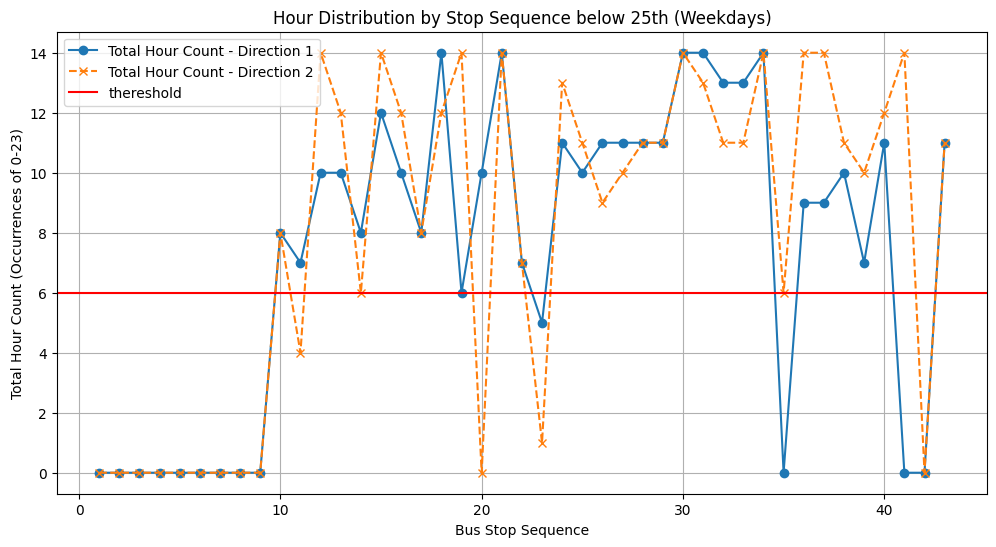

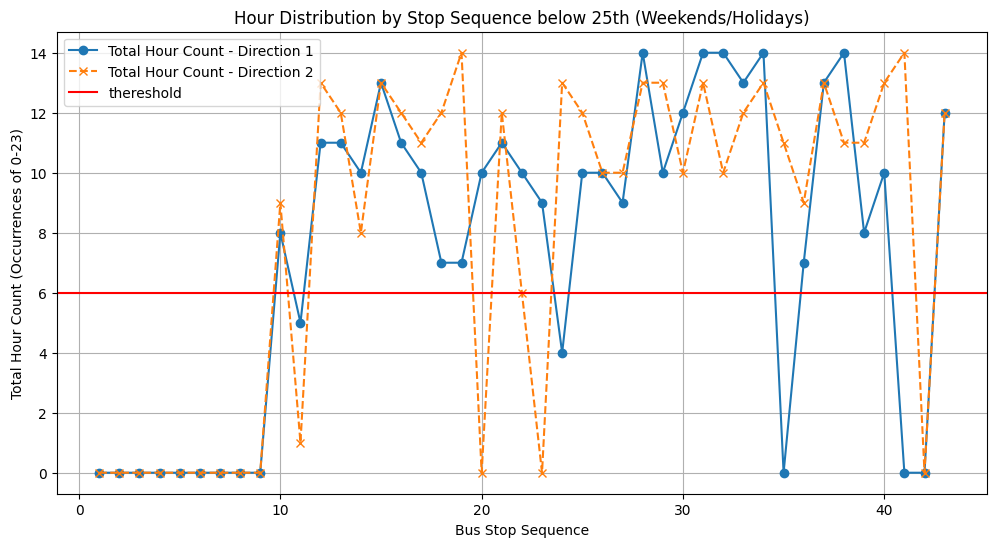

Percentage of stop sequences exceeding 10 in Direction 1: 34.88%
Percentage of stop sequences exceeding 10 in Direction 2: 51.16%


In [13]:
# Step 1: Count occurrences of each TIME_PER_HOUR per StopSequence, DAY_TYPE, and Direction
hour_counts = (
    merged_data.groupby(['StopSequence', 'DAY_TYPE', 'Direction'])
    .size()
    .reset_index(name='Total_Hour_Count')
)

# Step 2: Generate all StopSequence, DAY_TYPE, and Direction combinations for filling missing values
max_sequence = merged_data['StopSequence'].max()
directions = merged_data['Direction'].unique()
day_types = merged_data['DAY_TYPE'].unique()
full_index = pd.MultiIndex.from_product(
    [range(1, max_sequence + 1), day_types, directions], 
    names=['StopSequence', 'DAY_TYPE', 'Direction']
)

# Step 3: Reindex hour_counts to include all combinations, filling missing values with 0
hour_counts = hour_counts.set_index(['StopSequence', 'DAY_TYPE', 'Direction']).reindex(full_index, fill_value=0).reset_index()

# Step 4: Separate data by day type
weekday_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKDAY']
weekend_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Step 5: Reverse StopSequence for Direction 2 to show it as the opposite direction
weekday_data_dir1 = weekday_data[weekday_data['Direction'] == 1]
weekday_data_dir2 = weekday_data[weekday_data['Direction'] == 2].sort_values(by="StopSequence", ascending=False)
weekday_data_dir2['Reverse_Num'] = range(1, len(weekday_data_dir2) + 1)

weekend_data_dir1 = weekend_data[weekend_data['Direction'] == 1]
weekend_data_dir2 = weekend_data[weekend_data['Direction'] == 2].sort_values(by="StopSequence", ascending=False)
weekend_data_dir2['Reverse_Num'] = range(1, len(weekend_data_dir2) + 1)

# Plotting function for both directions on the same graph
def plot_hour_distribution(data_dir1, data_dir2, title):
    plt.figure(figsize=(12, 6))
    
    # Plot Direction 1
    plt.plot(data_dir1['StopSequence'], data_dir1['Total_Hour_Count'], label="Total Hour Count - Direction 1", marker='o')
    
    # Plot Direction 2 with reversed StopSequence
    plt.plot(data_dir2['Reverse_Num'], data_dir2['Total_Hour_Count'], label="Total Hour Count - Direction 2", marker='x', linestyle='--')
    plt.axhline(y=6, color='r', linestyle='-', label='thereshold')
    # Adding labels and title
    plt.xlabel("Bus Stop Sequence")
    plt.ylabel("Total Hour Count (Occurrences of 0-23)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for weekdays with both directions
plot_hour_distribution(weekday_data_dir1, weekday_data_dir2, "Hour Distribution by Stop Sequence below 25th (Weekdays)")

# Plot for weekends/holidays with both directions
plot_hour_distribution(weekend_data_dir1, weekend_data_dir2, "Hour Distribution by Stop Sequence below 25th (Weekends/Holidays)")


# Define threshold
threshold = 10

# Calculate total sequences and sequences exceeding threshold for each direction
total_sequences_dir1 = weekday_data_dir1.shape[0]
exceeding_sequences_dir1 = weekday_data_dir1[weekday_data_dir1['Total_Hour_Count'] > threshold].shape[0]

total_sequences_dir2 = weekday_data_dir2.shape[0]
exceeding_sequences_dir2 = weekday_data_dir2[weekday_data_dir2['Total_Hour_Count'] > threshold].shape[0]

# Calculate percentages
percentage_exceed_dir1 = (exceeding_sequences_dir1 / total_sequences_dir1) * 100 if total_sequences_dir1 else 0
percentage_exceed_dir2 = (exceeding_sequences_dir2 / total_sequences_dir2) * 100 if total_sequences_dir2 else 0

# Display the results
print(f"Percentage of stop sequences exceeding {threshold} in Direction 1: {percentage_exceed_dir1:.2f}%")
print(f"Percentage of stop sequences exceeding {threshold} in Direction 2: {percentage_exceed_dir2:.2f}%")


In [14]:
def calculate_exceeding_stop_sequences(bus_service, bus_routes, bus_ridership, avg_ridership_by_stop, threshold=10):
    # Step 1: Filter the route data for the specified bus service
    bus_service_route = bus_routes[bus_routes['ServiceNo'] == bus_service]
    
    # Step 2: Merge with ridership data
    merged_service = bus_service_route.merge(bus_ridership, left_on='BusStopCode', right_on='PT_CODE')
    
    # Step 3: Calculate ridership statistics by stop and time
    ridership_busstops = merged_service.groupby(['BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
        'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
        'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    }).reset_index()
    ridership_busstops.columns = ['BusStopCode', 'TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']
    
    # Step 4: Merge with average ridership data
    merged_ridership = ridership_busstops.merge(avg_ridership_by_stop, on=['TIME_PER_HOUR', 'DAY_TYPE'], suffixes=('_30', '_AVG'))
    
    # Step 5: Filter stops where TAP_IN/TAP_OUT below the 25th percentile of average, within time bounds
    filtered_busstops = merged_ridership[
        (merged_ridership['TAP_IN_MEAN_30'] < merged_ridership['TAP_IN_25_AVG']) &
        (merged_ridership['TAP_OUT_MEAN_30'] < merged_ridership['TAP_OUT_25_AVG']) &
        (merged_ridership['TIME_PER_HOUR'] > 5) & (merged_ridership['TIME_PER_HOUR'] < 20)
    ]
    
    # Step 6: Merge with the original bus route data to get StopSequence and Direction
    merged_data = pd.merge(
        filtered_busstops, merged_service,
        how="inner",
        left_on=["BusStopCode", "TIME_PER_HOUR", "DAY_TYPE"],
        right_on=["BusStopCode", "TIME_PER_HOUR", "DAY_TYPE"]
    )
    
    # Step 7: Count occurrences of each TIME_PER_HOUR per StopSequence, DAY_TYPE, and Direction
    hour_counts = (
        merged_data.groupby(['StopSequence', 'DAY_TYPE', 'Direction'])
        .size()
        .reset_index(name='Total_Hour_Count')
    )
    
    # Step 8: Generate all StopSequence, DAY_TYPE, and Direction combinations and fill missing values with 0
    max_sequence = merged_data['StopSequence'].max()
    if pd.notna(max_sequence):  # Check if max_sequence is not NaN
        max_sequence = int(max_sequence)
        directions = merged_data['Direction'].unique()
        day_types = merged_data['DAY_TYPE'].unique()
        full_index = pd.MultiIndex.from_product(
            [range(1, max_sequence + 1), day_types, directions], 
            names=['StopSequence', 'DAY_TYPE', 'Direction']
        )
        hour_counts = hour_counts.set_index(['StopSequence', 'DAY_TYPE', 'Direction']).reindex(full_index, fill_value=0).reset_index()
    
    # Step 9: Separate by direction
    weekday_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKDAY']
    weekday_data_dir1 = weekday_data[weekday_data['Direction'] == 1]
    weekday_data_dir2 = weekday_data[weekday_data['Direction'] == 2].sort_values(by="StopSequence", ascending=False)
    
    # Step 10: Calculate the total and exceeding sequences
    total_sequences_dir1 = weekday_data_dir1.shape[0]
    exceeding_sequences_dir1 = weekday_data_dir1[weekday_data_dir1['Total_Hour_Count'] > threshold].shape[0]
    total_sequences_dir2 = weekday_data_dir2.shape[0]
    exceeding_sequences_dir2 = weekday_data_dir2[weekday_data_dir2['Total_Hour_Count'] > threshold].shape[0]
    
    # Step 11: Calculate percentages
    percentage_exceed_dir1 = (exceeding_sequences_dir1 / total_sequences_dir1) * 100 if total_sequences_dir1 else 0
    percentage_exceed_dir2 = (exceeding_sequences_dir2 / total_sequences_dir2) * 100 if total_sequences_dir2 else 0
    
    # Return the results
    return {
        "ServiceNo": bus_service,
        "Threshold": threshold,
        "Percentage_Exceeding_Direction_1": percentage_exceed_dir1,
        "Percentage_Exceeding_Direction_2": percentage_exceed_dir2
    }


In [15]:
# test case

results = calculate_exceeding_stop_sequences(
    bus_service='198', 
    bus_routes=bus_routes, 
    bus_ridership=bus_ridership_202409, 
    avg_ridership_by_stop=average_ridership_by_stop,
    threshold=10
)

print("Results:", results)

Results: {'ServiceNo': '198', 'Threshold': 10, 'Percentage_Exceeding_Direction_1': 0.0, 'Percentage_Exceeding_Direction_2': 3.4482758620689653}


In [16]:
# List of unique bus services
unique_services = bus_routes['ServiceNo'].unique()
print(len(unique_services))


556


In [17]:
# Initialize an empty list to store results
all_results = []

# Loop over each bus service and calculate exceeding stop sequences
for service in unique_services:
    print(service)
    results = calculate_exceeding_stop_sequences(
        bus_service=service, 
        bus_routes=bus_routes, 
        bus_ridership=bus_ridership_202409, 
        avg_ridership_by_stop=average_ridership_by_stop,
        threshold=10
    )
    # Append each result to the list
    all_results.append(results)

# Convert list of results to DataFrame
results_df = pd.DataFrame(all_results)

results_df.head()


10
100
100A
101
102
102A
102B
103
105
105B
106
106A
107
107M
109
109A
10e
11
110
111
112
112A
113
113A
114
114A
115
116
116A
117
117A
117M
118
118A
118B
119
12
120
121
122
123
123M
124
125
125A
127
127A
129
129A
129B
12e
13
130
131
131A
132
133
134
135
136
137
137A
138
138A
138B
139
139A
13A
14
140
141
142
142A
143
143M
145
145A
146
147
147A
14A
14e
15
150
151
153
154
154A
154B
155
156
157
158
158A
159
159A
159B
15A
16
160
160A
161
162
163
163A
163B
165
166
167
168
168A
169
169A
169B
16M
17
170
170X
171
172
173
173A
174
174e
175
176
177
178
178A
179
179A
17A
18
180
180A
181
181M
182
182M
183
183B
184
185
186
187
188
188e
189
189A
19
190
190A
191
192
193
194
195
195A
196
196A
196e
197
198
198A
199
2
20
200
200A
201
20A
21
21A
22
222
222A
222B
225G
225W
228
229
23
230
231
232
235
238
24
240
240A
240M
241
241A
242
243G
243W
246
247
248
248M
249
249A
25
251
252
253
254
255
257
258
26
261
262
265
268
268A
268B
268C
269
269A
27
272
273
27A
28
282
284
285
29
291
292
293
296
298
29A
2B
3
30
30

,ServiceNo,Threshold,Percentage_Exceeding_Direction_1,Percentage_Exceeding_Direction_2
0,10,10,1.470588,1.470588
1,100,10,4.761905,2.380952
2,100A,10,0.000000,0.000000
3,101,10,0.000000,0.000000
4,102,10,1.851852,0.000000


In [18]:
# Filter out rows where Percentage_Exceeding_Direction_2 is 0
filtered_services = results_df[results_df['Percentage_Exceeding_Direction_2'] != 0]

# Sort by both percentage columns in descending order
sorted_services = filtered_services.sort_values(
    by=['Percentage_Exceeding_Direction_1', 'Percentage_Exceeding_Direction_2'], 
    ascending=False
)

# Select the top 10 services based on the sorted percentages
sorted_services



,ServiceNo,Threshold,Percentage_Exceeding_Direction_1,Percentage_Exceeding_Direction_2
154,193,10,34.883721,51.162791
484,925,10,28.947368,26.315789
119,172,10,26.923077,26.923077
153,192,10,24.242424,27.272727
374,72,10,16.279070,16.279070
...,...,...,...,...
325,56,10,0.000000,4.000000
162,198,10,0.000000,3.448276
56,133,10,0.000000,2.272727
546,99,10,0.000000,2.272727


### Using Bus frequency data to get deeper insights
We will try using the indiviual bus frequency to model number of trips per hour to get a better representation of the ridership

In [19]:
bus_frequency = pd.read_json("../data/BusServices.json")
bus_frequency

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,118,GAS,1,TRUNK,65009,97009,5-08,8-12,8-10,09-14,
1,118,GAS,2,TRUNK,97009,65009,10-10,8-11,4-08,9-12,
2,118A,GAS,1,TRUNK,65009,96119,06-66,-,-,-,
3,118B,GAS,1,TRUNK,96111,65191,-,-,24-57,-,
4,119,GAS,1,TRUNK,65009,65009,09-13,12-18,12-15,15-17,Hougang St 21
...,...,...,...,...,...,...,...,...,...,...,...
722,98B,TTS,1,TRUNK,28501,21099,05-52,-,-,-,
723,98M,TTS,1,TRUNK,28009,28009,-,17-18,-,12-17,Corporation Rd
724,990,TTS,1,TRUNK,43009,43009,11-11,13-15,12-14,12-14,Jurong Gateway Rd
725,992,TTS,1,TRUNK,43009,41009,03-09,08-12,04-08,04-13,


In [20]:
# Function to calculate avaerage from frequency range
def mean_frequency(freq):
    if freq == '-' or pd.isna(freq):
        return None  # Handle missing or empty frequencies
    # Split frequency range and convert to integers
    range_vals = list(map(int, freq.split('-')))
    return sum(range_vals) / 2  # Calculate the mean

# Apply median calculation to each frequency column
bus_frequency['AM_Peak_Freq'] = bus_frequency['AM_Peak_Freq'].apply(mean_frequency)
bus_frequency['AM_Offpeak_Freq'] = bus_frequency['AM_Offpeak_Freq'].apply(mean_frequency)
bus_frequency['PM_Peak_Freq'] = bus_frequency['PM_Peak_Freq'].apply(mean_frequency)
bus_frequency['PM_Offpeak_Freq'] = bus_frequency['PM_Offpeak_Freq'].apply(mean_frequency)

bus_frequency = bus_frequency.fillna(0)

# Drop the Operator column
bus_frequency = bus_frequency.drop(columns=['Operator'])
bus_frequency.head()

,ServiceNo,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,118,1,TRUNK,65009,97009,6.5,10.0,9.0,11.5,
1,118,2,TRUNK,97009,65009,10.0,9.5,6.0,10.5,
2,118A,1,TRUNK,65009,96119,36.0,0.0,0.0,0.0,
3,118B,1,TRUNK,96111,65191,0.0,0.0,40.5,0.0,
4,119,1,TRUNK,65009,65009,11.0,15.0,13.5,16.0,Hougang St 21


In [21]:
# read the bus trips data

bus_trips = pd.read_csv("../data/Passengers_Aug2024/origin_destination_bus_202408.csv")
bus_trips

FileNotFoundError: [Errno 2] No such file or directory: '../data/Passengers_Aug2024/origin_destination_bus_202408.csv'